In [4]:

# we were given transaction data as .xlsx
# and purchase behavior as .csv
import pandas as pd
dataframe = pd.read_excel('QVI_transaction_data.xlsx')

#print(type(dataframe))

In [5]:
import numpy as np
import scipy as stats
type(dataframe.STORE_NBR)
dataframe.head(5)
#visualize the first 5 rows 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
dataframe.describe()
#expected numeric columns are in numeric form
# need to check date columns 
dataframe['DATE'] = pd.to_datetime(dataframe.DATE,origin="1899-12-30",unit='D')
# this converts the integer dates to pandas timestamps

In [7]:
# now, we need to summerize the PROD_NAME column

names = dataframe.PROD_NAME.tolist()
words = []
for name in names:
    id = 0
    words.append(name.split(" "))
    id +=1

prod_names = []
for entry in words:
    count = 0
    while '' in entry:
        entry.remove('')
    while '&' in entry:
        entry.remove('&')

    entry = [x for x in entry if all(y not in x for y in '1234567890')]
    prod_names.append(entry)


# at this point we should have all the words cleaned out 
wordfreq = {}
for prod in prod_names:
    for word in prod:
        if word not in wordfreq:
            wordfreq[word] = 0
        wordfreq[word] += 1
words = sorted(wordfreq.items(), key=lambda item: item[1])
words.reverse()
print(words)
#now we have a sorted list of tuples that show us the most popular words

[('Chips', 49770), ('Kettle', 41288), ('Smiths', 28860), ('Salt', 27976), ('Cheese', 27890), ('Pringles', 25102), ('Doritos', 24962), ('Crinkle', 23960), ('Corn', 22063), ('Original', 21560), ('Cut', 20754), ('Chip', 18645), ('Salsa', 18094), ('Chicken', 15407), ('Sea', 14145), ('Thins', 14075), ('Sour', 13882), ('Crisps', 12607), ('Vinegar', 12402), ('Chilli', 12389), ('RRD', 11894), ('Infuzions', 11057), ('Supreme', 10963), ('WW', 10320), ('Popd', 9693), ('Cobs', 9693), ('Tortilla', 9580), ('Tostitos', 9471), ('Twisties', 9454), ('Sensations', 9429), ('Dip', 9324), ('Paso', 9324), ('El', 9324), ('Old', 9324), ('Sweet', 7883), ('Lime', 7852), ('Tomato', 7669), ('Cream', 7618), ('Thinly', 7507), ('Tyrrells', 6442), ('And', 6373), ('BBQ', 6351), ('Tangy', 6332), ('Waves', 6272), ('Grain', 6272), ('Salted', 6248), ('Lightly', 6248), ('Soy', 6121), ('Natural', 6050), ('Mild', 6048), ('Deli', 5885), ('Rock', 5885), ('Red', 5885), ('Thai', 4737), ('Burger', 4733), ('Swt', 4718), ('Chives', 

In [9]:
df2 = dataframe.copy()

In [10]:
# now, we must clean out the salsa products
#chips_only = pd.DataFrame(columns = dataframe.columns)
df2 = dataframe.copy()
for index, row in dataframe.iterrows():
    if 'salsa' in row['PROD_NAME'].lower():
        
        dataframe.drop(index,inplace=True)
 
dataframe.describe()
# looks like we removed products with the word 'salsa'
# loop takes five minutes to run ???

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [11]:
# now we need to remove outlier transactions
# find index of outlier and remove all transactions with that loyalty card number

def remove_outliers(df):
    flagged_ids = []
    for index, row in df.iterrows():
        if row['PROD_QTY'] > 100:
            flagged_ids.append(row['LYLTY_CARD_NBR'])
            
    for index, row in df.iterrows():
        if row['LYLTY_CARD_NBR'] in flagged_ids:
            df.drop(index,inplace=True)
            
    

remove_outliers(df2)
df2.describe()
# now we can see that function should remove outliers, 
# and remove any transactions attached to the same loyalty card numbers

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [12]:
# now, we need to create a sequence of dates, 
df3 = df2.copy()
def sequence_dates(df):
    dates = df.groupby(df['DATE']).agg({'count'})
    return dates
    
print(sequence_dates(df2).STORE_NBR)
# as expected, we only get 364 days, suggesting that we are missing a day. 
        

            count
DATE             
2018-07-01    724
2018-07-02    711
2018-07-03    722
2018-07-04    714
2018-07-05    712
...           ...
2019-06-26    723
2019-06-27    709
2019-06-28    730
2019-06-29    745
2019-06-30    744

[364 rows x 1 columns]


            count
index            
2018-12-23  917.0
2018-12-24  939.0
2018-12-25    NaN
2018-12-26  753.0
2018-12-27  732.0
2018-12-28  720.0
2018-12-29  706.0
2018-12-30  747.0
2018-12-31  708.0
2019-01-01  686.0
2019-01-02  722.0
2019-01-03  672.0
2019-01-04  747.0
2019-01-05  697.0
2019-01-06  731.0


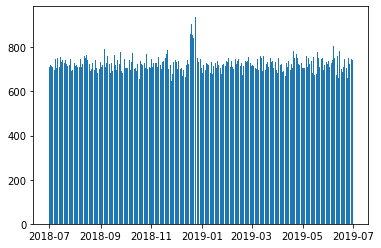

In [13]:
import matplotlib.pyplot as plt
dates = pd.date_range(start='7/1/2018',end ='6/30/2019')
#print(dates)
zeros = pd.DataFrame(np.zeros(len(dates)),index = dates)
counts = pd.concat((zeros,sequence_dates(df3).STORE_NBR)).reset_index().drop_duplicates(subset=['index'], keep='last').set_index('index').sort_index()
counts.drop(0,axis=1, inplace=True)
#print(counts)
plt.bar(dates,counts['count'])
print(counts.iloc[175:190])

# we can see there is no entry for 12/25, stores are closed on christmas


<BarContainer object of 20 artists>

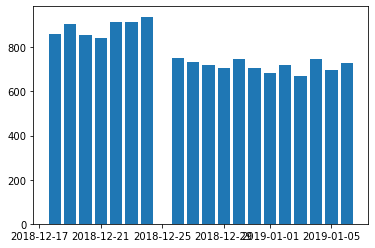

In [14]:
# now lets zoom in on december
plt.bar(dates[170:190],counts['count'][170:190])
# thats crazy 

In [15]:
# now, we want to organize the data by pack size
import re
transaction_data = df2.copy()
def pull_pack_size(df):
    names = df.PROD_NAME
    pack_sizes = []
    for name in names:
        pack_sizes.append(re.findall(r'\d+', name))

    pack_sizes=[int(pack_sizes[i][0]) for i in range(0,len(pack_sizes))]
    
    df.insert(6,"PACK_SIZE",pack_sizes,True)

pull_pack_size(transaction_data)
transaction_data.head()
transaction_data.describe()
# Now, we have a new column, PACK_SIZE
# looks good, the smallest pack is 70 g and the largest is 380 g


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PACK_SIZE,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,182.425512,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,64.325148,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,70.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,150.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,170.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,175.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,380.000000,5.000000,29.500000


(array([  4515.,  23841.,  74460., 106133.,  12309.,   3169.,   6285.,
         15166.,  12540.,   6416.]),
 array([ 70., 101., 132., 163., 194., 225., 256., 287., 318., 349., 380.]),
 <BarContainer object of 10 artists>)

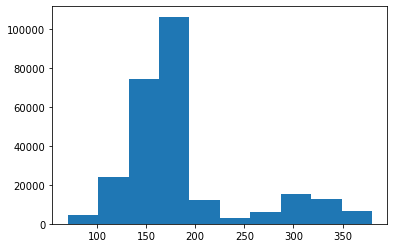

In [16]:
# now lets plot a histogram of PACK_SIZE
plt.hist(transaction_data.PACK_SIZE)
# this should show the number of transactions by pack size

In [17]:
transaction_data['BRAND'] = transaction_data['PROD_NAME'].map(lambda PROD_NAME: PROD_NAME.split()[0])
column = transaction_data.pop('BRAND')
transaction_data.insert(5,"BRAND",column)
for index, row in transaction_data.iterrows():
    if row['BRAND'].lower() == 'red':
        transaction_data.at[index,'BRAND'] = 'RRD'
        
    if row['BRAND'].lower() == 'natural':
        transaction_data.at[index,'BRAND'] = 'NCC'
    
    if row['BRAND'].lower() == 'dorito':
        transaction_data.at[index,'BRAND'] = 'Doritos'

    if row['BRAND'].lower() == 'infzns':
        transaction_data.at[index,'BRAND'] = 'Infuzions'

    if row['BRAND'].lower() in ['grain','grnwves','snbts']:
        transaction_data.at[index,'BRAND'] = 'Sunbites'
    
    if row['BRAND'].lower() == 'ww':
        transaction_data.at[index,'BRAND'] = 'Woolworths'

    if row['BRAND'].lower() in ['smith','burger']:
        transaction_data.at[index,'BRAND'] = 'Smiths'

# this code will clean up the brand names to make sure they are consistent

In [18]:
brandfreq = {}
for brand in transaction_data['BRAND']:
    
    if brand not in brandfreq:
        brandfreq[brand] = 0
    brandfreq[brand] += 1
brands = sorted(brandfreq.items(), key=lambda item: item[1])
brands.reverse()
brands

# now we have the data sorted by brand

[('Kettle', 41288),
 ('Smiths', 33387),
 ('Doritos', 28145),
 ('Pringles', 25102),
 ('RRD', 17779),
 ('Woolworths', 14757),
 ('Infuzions', 14201),
 ('Thins', 14075),
 ('Sunbites', 10748),
 ('Cobs', 9693),
 ('Tostitos', 9471),
 ('Twisties', 9454),
 ('Old', 9324),
 ('NCC', 7469),
 ('Tyrrells', 6442),
 ('Cheezels', 4603),
 ('CCs', 4551),
 ('Cheetos', 2927),
 ('French', 1418)]

In [19]:
import csv
#read the spam csv file into a list

def read_data_from_file(x):

    data = []

    with open(x,'r',encoding="ISO-8859-1") as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')

        # skip the first row

        next(csv_reader)

        for row in csv_reader:

            data.append(row)

    return data

data = read_data_from_file('QVI_purchase_behaviour.csv')

Now, lets take a look at the purchase behavior data

In [20]:
purchase_behavior = pd.read_csv('QVI_purchase_behaviour.csv')
purchase_behavior.tail()
# view a sample of data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget
72636,2373711,YOUNG SINGLES/COUPLES,Mainstream


In [21]:
flags = 0
tie = 0
for number in transaction_data.LYLTY_CARD_NBR.values:
    if number not in purchase_behavior.LYLTY_CARD_NBR.values:
        flags += 1
    else:
        tie +=1
print(flags)

# zeros flags implies each transaction has a matched customer!
# no nulls

0


In [22]:
data = pd.merge(transaction_data,purchase_behavior,on='LYLTY_CARD_NBR')
len(data.index)
# same length as transaction data!
# save this dataset as a csv for task 2

264834

In [467]:
# now, we want to sort out metrics based on customer type 
grouped_lifestage = data.groupby(['LIFESTAGE'])

young_families = grouped_lifestage.get_group('YOUNG FAMILIES')
young_singlescouples = grouped_lifestage.get_group('YOUNG SINGLES/COUPLES')
midage_singlescouples = grouped_lifestage.get_group('MIDAGE SINGLES/COUPLES')
new_families = grouped_lifestage.get_group('NEW FAMILIES')
older_families = grouped_lifestage.get_group('OLDER FAMILIES')
older_singlescouples = grouped_lifestage.get_group('OLDER SINGLES/COUPLES')
retirees = grouped_lifestage.get_group('RETIREES')
print(len(retirees.index))

46431


LIFESTAGE
MIDAGE SINGLES/COUPLES    172523.80
NEW FAMILIES               47347.95
OLDER FAMILIES            328519.90
OLDER SINGLES/COUPLES     376019.65
RETIREES                  342381.90
YOUNG FAMILIES            294627.90
YOUNG SINGLES/COUPLES     243756.60
Name: TOT_SALES, dtype: float64


<BarContainer object of 7 artists>

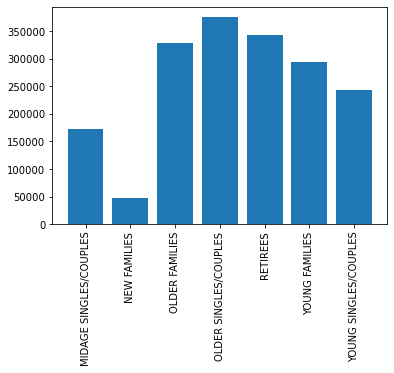

In [483]:
print(grouped_lifestage.sum()['TOT_SALES'])
# this gives the total sales for each lifestage
plt.xticks(rotation=90)
plt.bar(grouped_lifestage.sum()['TOT_SALES'].index,grouped_lifestage.sum()['TOT_SALES'].values)

PREMIUM_CUSTOMER
Budget        631406.85
Mainstream    700865.40
Premium       472905.45
Name: TOT_SALES, dtype: float64


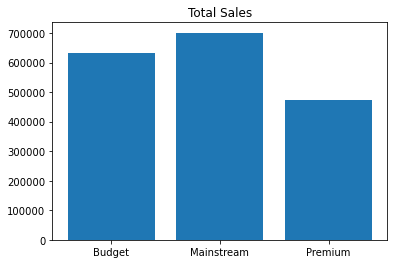

In [484]:
# now lets do the same thing for premium customer.
grouped_customer = data.groupby(['PREMIUM_CUSTOMER'])
plt.title('Total Sales')
plt.bar(grouped_customer.sum()['TOT_SALES'].index,grouped_customer.sum()['TOT_SALES'].values)
print(grouped_customer.sum()['TOT_SALES'])

                                                  0
('NEW FAMILIES', 'Premium')                10760.80
('NEW FAMILIES', 'Mainstream')             15979.70
('NEW FAMILIES', 'Budget')                 20607.45
('MIDAGE SINGLES/COUPLES', 'Budget')       33345.70
('YOUNG SINGLES/COUPLES', 'Premium')       39052.30
('MIDAGE SINGLES/COUPLES', 'Premium')      54443.85
('YOUNG SINGLES/COUPLES', 'Budget')        57122.10
('OLDER FAMILIES', 'Premium')              75242.60
('YOUNG FAMILIES', 'Premium')              78571.70
('MIDAGE SINGLES/COUPLES', 'Mainstream')   84734.25
('YOUNG FAMILIES', 'Mainstream')           86338.25
('RETIREES', 'Premium')                    91296.65
('OLDER FAMILIES', 'Mainstream')           96413.55
('RETIREES', 'Budget')                    105916.30
('OLDER SINGLES/COUPLES', 'Premium')      123537.55
('OLDER SINGLES/COUPLES', 'Mainstream')   124648.50
('OLDER SINGLES/COUPLES', 'Budget')       127833.60
('YOUNG FAMILIES', 'Budget')              129717.95
('RETIREES',

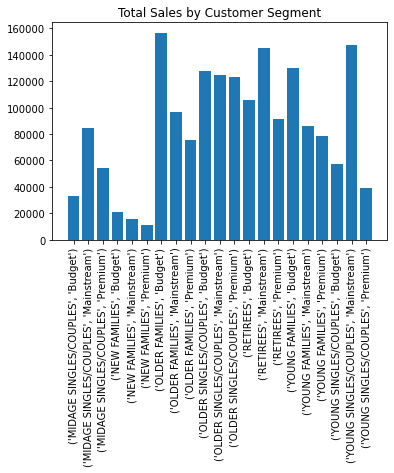

In [692]:
grouped = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).sum()
groups = grouped['TOT_SALES'].index.tolist()

sales = pd.DataFrame(grouped['TOT_SALES'].values.tolist(),index = [str(i) for i in groups])
plt.xticks(rotation = 90)
plt.title('Total Sales by Customer Segment')
plt.bar([str(i) for i in groups],grouped['TOT_SALES'].values.tolist())
print(sales.sort_values(by=0))
# we can see that sales are coming mainly from Budget - older families, Mainstream - young
#singles/couples, and Mainstream - retirees

LIFESTAGE               PREMIUM_CUSTOMER
NEW FAMILIES            Premium              575
                        Mainstream           830
                        Budget              1087
MIDAGE SINGLES/COUPLES  Budget              1474
OLDER FAMILIES          Premium             2231
MIDAGE SINGLES/COUPLES  Premium             2369
YOUNG FAMILIES          Premium             2398
YOUNG SINGLES/COUPLES   Premium             2480
YOUNG FAMILIES          Mainstream          2685
OLDER FAMILIES          Mainstream          2788
MIDAGE SINGLES/COUPLES  Mainstream          3298
YOUNG SINGLES/COUPLES   Budget              3647
RETIREES                Premium             3812
YOUNG FAMILIES          Budget              3953
RETIREES                Budget              4385
OLDER FAMILIES          Budget              4611
OLDER SINGLES/COUPLES   Premium             4682
                        Budget              4849
                        Mainstream          4858
RETIREES                Main

<BarContainer object of 21 artists>

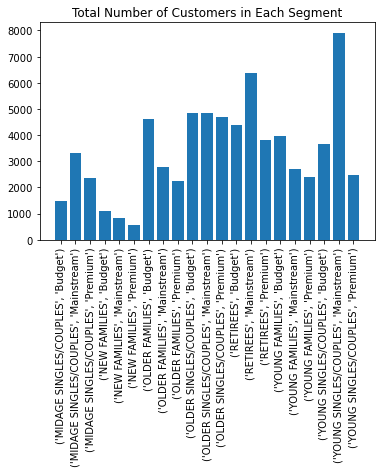

In [693]:
# now, lets see if which category has the most customers
counts = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()
print(counts.sort_values())

plt.xticks(rotation = 90)
plt.title('Total Number of Customers in Each Segment')
plt.bar([str(i) for i in counts.index.tolist()],counts.values)
# we can that the retirees - mainstream, and young couples/singles - premium have many customers,
# while the older - budget has fewer

In [649]:
# now we look at sales per customer
categories = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().index.tolist()

customers = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].unique()

averages = {}
for index, row in pd.DataFrame(customers).iterrows():
    sum = 0
    for i in row[0]:
        sum = data.loc[data['LYLTY_CARD_NBR']==i,'PROD_QTY'].sum()+sum
        averages[index] = sum/len(row[0])

print({k: v for k, v in sorted(averages.items(), key=lambda item: item[1])})

{('YOUNG SINGLES/COUPLES', 'Budget'): 4.250068549492734, ('YOUNG SINGLES/COUPLES', 'Premium'): 4.264112903225806, ('YOUNG SINGLES/COUPLES', 'Mainstream'): 4.575596816976128, ('NEW FAMILIES', 'Premium'): 4.815652173913043, ('NEW FAMILIES', 'Budget'): 4.821527138914443, ('NEW FAMILIES', 'Mainstream'): 4.891566265060241, ('RETIREES', 'Mainstream'): 5.925920100660585, ('MIDAGE SINGLES/COUPLES', 'Budget'): 6.026458616010855, ('MIDAGE SINGLES/COUPLES', 'Premium'): 6.0785141409877586, ('RETIREES', 'Premium'): 6.1033578174186776, ('RETIREES', 'Budget'): 6.141847206385405, ('MIDAGE SINGLES/COUPLES', 'Mainstream'): 6.432080048514251, ('OLDER SINGLES/COUPLES', 'Mainstream'): 6.712021407986826, ('OLDER SINGLES/COUPLES', 'Premium'): 6.769542930371636, ('OLDER SINGLES/COUPLES', 'Budget'): 6.781398226438441, ('YOUNG FAMILIES', 'Mainstream'): 8.638361266294227, ('YOUNG FAMILIES', 'Premium'): 8.716013344453712, ('YOUNG FAMILIES', 'Budget'): 8.722995193523905, ('OLDER FAMILIES', 'Premium'): 9.0717167189

<BarContainer object of 21 artists>

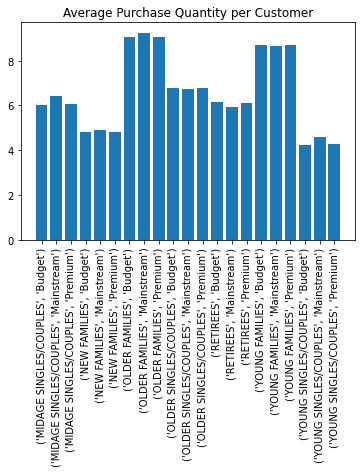

In [650]:
plt.xticks(rotation = 90)
plt.title('Average Purchase Quantity per Customer')
plt.bar([str(i) for i in averages.keys()],averages.values())

# older and younger families buy more units on average

In [663]:
avg_price_paid = {}


for index, row in pd.DataFrame(customers).iterrows():
    sum = 0
    for i in row[0]:
        sum = (data.loc[data['LYLTY_CARD_NBR']==i,'TOT_SALES'].sum()/data.loc[data['LYLTY_CARD_NBR']==i,'PROD_QTY'].sum())+sum
        
        avg_price_paid[index] = sum/len(row[0])
    
print(avg_price_paid)

{('MIDAGE SINGLES/COUPLES', 'Budget'): 3.7486243441548908, ('MIDAGE SINGLES/COUPLES', 'Mainstream'): 4.0634880306399985, ('MIDAGE SINGLES/COUPLES', 'Premium'): 3.7721208317363986, ('NEW FAMILIES', 'Budget'): 3.89171035751532, ('NEW FAMILIES', 'Mainstream'): 3.8980396307173426, ('NEW FAMILIES', 'Premium'): 3.8599895500634673, ('OLDER FAMILIES', 'Budget'): 3.8161117700633422, ('OLDER FAMILIES', 'Mainstream'): 3.8132909435936497, ('OLDER FAMILIES', 'Premium'): 3.7858387186880784, ('OLDER SINGLES/COUPLES', 'Budget'): 3.9029762610987357, ('OLDER SINGLES/COUPLES', 'Mainstream'): 3.814283731015405, ('OLDER SINGLES/COUPLES', 'Premium'): 3.935973213671783, ('RETIREES', 'Budget'): 3.9604901941230155, ('RETIREES', 'Mainstream'): 3.8393934667537106, ('RETIREES', 'Premium'): 3.9594967650672728, ('YOUNG FAMILIES', 'Budget'): 3.8336692342341827, ('YOUNG FAMILIES', 'Mainstream'): 3.7966208978547633, ('YOUNG FAMILIES', 'Premium'): 3.8336419767284218, ('YOUNG SINGLES/COUPLES', 'Budget'): 3.6177226347333

<BarContainer object of 21 artists>

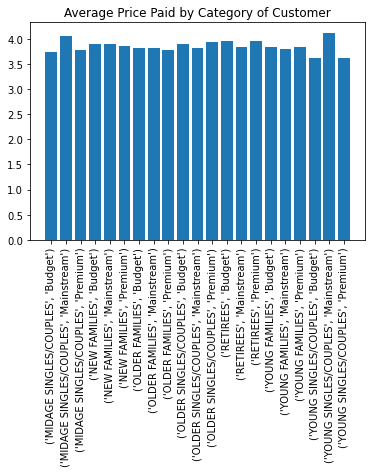

In [664]:
plt.xticks(rotation = 90)
plt.title('Average Price Paid by Category of Customer')
plt.bar([str(i) for i in avg_price_paid.keys()],avg_price_paid.values())
# here we see there is not a large difference in price per unit

In [ ]:
testdata = {}
for index, row in pd.DataFrame(customers).iterrows():
    lst = []
    for i in row[0]:
        lst.append(data.loc[data['LYLTY_CARD_NBR']==i,'TOT_SALES'].sum()/data.loc[data['LYLTY_CARD_NBR']==i,'PROD_QTY'].sum())
        testdata[index] = lst

#print(testdata)

In [683]:
# lets check with an independent t-test
import scipy.stats as stats
yscMain_yscPremium = stats.ttest_ind(testdata[('YOUNG SINGLES/COUPLES', 'Mainstream')],testdata[('YOUNG SINGLES/COUPLES', 'Premium')])
yscMain_yscBudget = stats.ttest_ind(testdata[('YOUNG SINGLES/COUPLES', 'Mainstream')],testdata[('YOUNG SINGLES/COUPLES', 'Budget')])
yscPremium_yscBudget = stats.ttest_ind(testdata[('YOUNG SINGLES/COUPLES', 'Premium')],testdata[('YOUNG SINGLES/COUPLES', 'Budget')])

print('yscMain_yscPremium: ',yscMain_yscPremium)
print('yscMain_yscBudget: ',yscMain_yscBudget)
print('yscPremium_yscBudget: ',yscPremium_yscBudget)

yscMain_yscPremium Ttest_indResult(statistic=27.872062662802172, pvalue=6.117781710525683e-165)
yscMain_yscBudget Ttest_indResult(statistic=31.358137815668496, pvalue=3.0967974946087864e-207)
yscPremium_yscBudget Ttest_indResult(statistic=-0.19917364274155583, pvalue=0.8421335275597455)


The results printed above show high t-values,low p-values for the comparisons ('YOUNG SINGLES/COUPLES', 'Mainstream') vs ('YOUNG SINGLES/COUPLES', 'Budget'), and ('YOUNG SINGLES/COUPLES', 'Mainstream') vs ('YOUNG SINGLES/COUPLES', 'Premium'), meaning that for both of these tests we can reject the null hypothesis and declare the average price for mainstream customer to be higher than the premium and budget customer categories. 

In [685]:
midageMain_midagePremium = stats.ttest_ind(testdata[('MIDAGE SINGLES/COUPLES', 'Mainstream')],testdata[('MIDAGE SINGLES/COUPLES', 'Premium')])
midageMain_midageBudget = stats.ttest_ind(testdata[('MIDAGE SINGLES/COUPLES', 'Mainstream')],testdata[('MIDAGE SINGLES/COUPLES', 'Budget')])
midagePremium_midageBudget = stats.ttest_ind(testdata[('MIDAGE SINGLES/COUPLES', 'Premium')],testdata[('MIDAGE SINGLES/COUPLES', 'Budget')])

print('midageMain_midagePremium: ',midageMain_midagePremium)
print('midageMain_midageBudget: ',midageMain_midageBudget)
print('midagePremium_midageBudget: ',midagePremium_midageBudget)

midageMain_midagePremium:  Ttest_indResult(statistic=13.869488749525793, pvalue=4.868433259926374e-43)
midageMain_midageBudget:  Ttest_indResult(statistic=13.367158437265307, pvalue=4.902937956318965e-40)
midagePremium_midageBudget:  Ttest_indResult(statistic=0.8213027866251766, pvalue=0.411524793301551)


The results printed above show high t-values,low p-values for the comparisons ('MIDAGE SINGLES/COUPLES', 'Mainstream') vs ('MIDAGE SINGLES/COUPLES', 'Budget'), and ('MIDAGE SINGLES/COUPLES', 'Mainstream') vs ('MIDAGE SINGLES/COUPLES', 'Premium'), meaning that for both of these tests we can reject the null hypothesis and declare the average price for mainstream customer to be higher than the premium and budget customer categories. 

In [741]:
# lets look at the category of customer that contributes most to sales
# see if we can find out if they prefer a particular brand of chip
# we're looking at the mainstream-young singles/couples

brandcounts = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['BRAND']
ysc_main_brands = brandcounts.get_group(('YOUNG SINGLES/COUPLES', 'Mainstream'))
print(ysc_main_brands.value_counts())

# now we can see the number of times each brand was bought by this group

Kettle        3844
Doritos       2379
Pringles      2315
Smiths        1983
Infuzions     1250
Thins         1166
Twisties       900
Tostitos       890
RRD            875
Cobs           864
Sunbites       774
Tyrrells       619
Woolworths     479
NCC            394
Cheezels       346
CCs            222
Cheetos        166
French          78
Name: BRAND, dtype: int64


In [742]:
# lets get this same list for older families - budget customers
older_families_budget_brands = brandcounts.get_group(('OLDER FAMILIES', 'Budget'))
print(older_families_budget_brands.value_counts())

Kettle        3320
Smiths        3107
Doritos       2032
Pringles      1996
RRD           1708
Woolworths    1213
Infuzions     1185
Thins         1171
Sunbites       976
Twisties       810
Cobs           760
NCC            741
Tostitos       705
Tyrrells       489
CCs            451
Cheezels       427
Cheetos        281
French         142
Name: BRAND, dtype: int64


{'Kettle': 0.09310211199379965, 'Doritos': 0.09431493815413891, 'Pringles': 0.09222372719305234, 'Smiths': 0.06212989942663784, 'Infuzions': 0.08802197028378284, 'Thins': 0.08284191829484902, 'Twisties': 0.0951977998730696, 'Tostitos': 0.09397106958082568, 'RRD': 0.05361191103486306, 'Cobs': 0.08913649025069638, 'Sunbites': 0.07201339784145888, 'Tyrrells': 0.09608817137534927, 'Woolworths': 0.04046975329503211, 'NCC': 0.05275137233900121, 'Cheezels': 0.0751683684553552, 'CCs': 0.04878048780487805, 'Cheetos': 0.0567133583874274, 'French': 0.05500705218617771}


<BarContainer object of 18 artists>

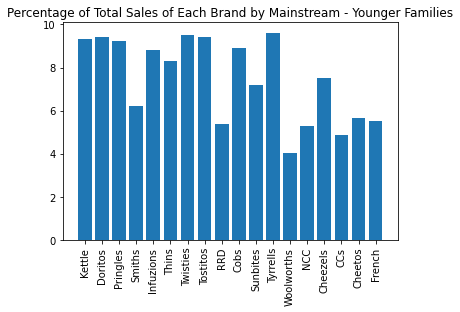

In [744]:
# It would be helpful to know how much each customer segment like a brand
# relative to the entire customer database
# using our dictionary of brands from before

percentofbrandsales_yscmain = {}
for index, row in ysc_main_brands.value_counts().iteritems():
    for i in brands:
        if index == i[0]:
            percentofbrandsales_yscmain[index] = row/i[1]

print(percentofbrandsales_yscmain)
plt.xticks(rotation = 90)
plt.title('Percentage of Total Sales of Each Brand by Mainstream - Young Singles/Couples')
plt.bar(percentofbrandsales_yscmain.keys(),[100*x for x in percentofbrandsales_yscmain.values()])

# looks like this segment is split but prefers Tyrells over the other segments

{'Kettle': 0.08041077310598721, 'Smiths': 0.0973462418147069, 'Doritos': 0.08055819854107199, 'Pringles': 0.07951557644809179, 'RRD': 0.10465045034005269, 'Woolworths': 0.10248394727948631, 'Infuzions': 0.08344482782902612, 'Thins': 0.08319715808170515, 'Sunbites': 0.09080759211016003, 'Twisties': 0.08567801988576264, 'Cobs': 0.07840709790570514, 'NCC': 0.09921006828223324, 'Tostitos': 0.07443775736458663, 'Tyrrells': 0.07590810307357963, 'CCs': 0.0990990990990991, 'Cheezels': 0.0927655876602216, 'Cheetos': 0.0960027331738982, 'French': 0.1001410437235543}


<BarContainer object of 18 artists>

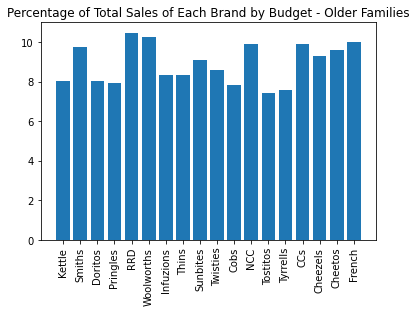

In [745]:
# Lets do the same thing for the Budget - Older Families group

percentofbrandsales_budolderfamilies = {}
for index, row in older_families_budget_brands.value_counts().iteritems():
    for i in brands:
        if index == i[0]:
            percentofbrandsales_budolderfamilies[index] = row/i[1]

print(percentofbrandsales_budolderfamilies)
plt.xticks(rotation = 90)
plt.title('Percentage of Total Sales of Each Brand by Budget - Older Families')
plt.bar(percentofbrandsales_budolderfamilies.keys(),[100*x for x in percentofbrandsales_budolderfamilies.values()])

# again its a tight split, but it looks like this segment prefers the Red Rock Deli brand

In [753]:
# now we can take a similar analysis for the pack size

pack_sizes = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PACK_SIZE']
older_fams_bud_packsize = np.mean(pack_sizes.get_group(('OLDER FAMILIES', 'Budget')))
young_fams_main_packsize = np.mean(pack_sizes.get_group(('YOUNG SINGLES/COUPLES', 'Mainstream')))
print('Older family - budget, average pack size: ',older_fams_bud_packsize)
print('Young singles/couples - mainstream, average pack size: ',young_fams_main_packsize)

# we have the averages for these two segments, lets see if we can compare them to the total average pack size

Older family - budget, average pack size:  175.54634191689132
Young singles/couples - mainstream, average pack size:  178.34424887433482


In [754]:
print(np.mean(data.PACK_SIZE))
# looks like the young singles/couples like to buy slightly larger pack sizes

175.5835211153441

In [755]:
# lets run a quick t-test
stats.ttest_ind(data.PACK_SIZE,pack_sizes.get_group(('YOUNG SINGLES/COUPLES', 'Mainstream')))

# this p-values suggests a significant different 

Ttest_indResult(statistic=-6.215484470191187, pvalue=5.124194856112823e-10)

In [24]:
data.to_csv('QVI_data.csv')

In [23]:
data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,BRAND,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,NCC,Natural Chip Compny SeaSalt175g,175,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs,CCs Nacho Cheese 175g,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,Woolworths,WW Original Stacked Chips 160g,160,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs,CCs Original 175g,175,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken 170g,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle,Kettle Sweet Chilli And Sour Cream 175g,175,2,10.8,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos,Tostitos Splash Of Lime 175g,175,1,4.4,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos,Doritos Mexicana 170g,170,2,8.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,Doritos,Doritos Corn Chip Mexican Jalapeno 150g,150,2,7.8,YOUNG SINGLES/COUPLES,Premium
